In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

from config.model_config import ModelConfig
from config.experiment_config import ExperimentConfig, AvailableDatasets
from vol_predict.features.preprocessor import OneToOnePreprocessor
from vol_predict.loss.loss import Loss

from vol_predict.models.dl.transformer_predictor import TransformerPredictor as Model
from vol_predict.models.dl.lstm_softplus_predictor import (
    LSTMSoftplusPredictor as Baseline,
)

from run import initialize_runner, run_backtest

In [3]:
config = ExperimentConfig()
config.DATASET = AvailableDatasets.BITCOIN

model_params = ModelConfig()
baseline_params = ModelConfig()

model_params.n_features = 1200
model_params.n_unique_features = 10

# Handles the features
feature_processor = OneToOnePreprocessor()

runner = initialize_runner(
    model_config=model_params,
    preprocessor=feature_processor,
    experiment_config=config,
)

Train data on 2018-06-05 00:00:00 to 2018-08-31 22:00:00
Test data on 2018-09-15 01:00:00 to 2018-09-30 21:00:00
Num Train Iterations: 1939
Num Features: 1212


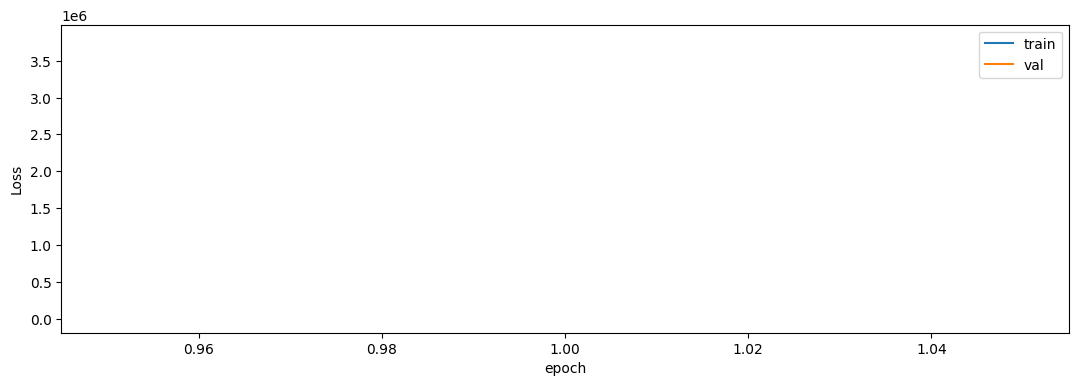

Training 2/100:   0%|          | 0/31 [00:00<?, ?it/s]

torch.Size([64, 120, 11])
torch.Size([64, 120, 11])
torch.Size([64, 120, 11])


Training 2/100:  10%|▉         | 3/31 [00:00<00:01, 22.90it/s]

torch.Size([64, 120, 11])
torch.Size([64, 120, 11])


Training 2/100:  19%|█▉        | 6/31 [00:00<00:01, 23.33it/s]

torch.Size([64, 120, 11])
torch.Size([64, 120, 11])
torch.Size([64, 120, 11])


Training 2/100:  32%|███▏      | 10/31 [00:00<00:00, 23.20it/s]

torch.Size([64, 120, 11])
torch.Size([64, 120, 11])


KeyboardInterrupt: 

In [4]:
runner.model_config.lr = 1e-2
runner.model_config.n_epochs = 100
runner.model_config.hidden_size = 64
runner.model_config.n_layers = 3
runner.model_config.batch_size = 16
runner.model_config.optimizer = torch.optim.Adam
runner.model_config.loss = Loss.NLL
runner.model_config.dropout = 0.20

result = run_backtest(
    model_cls=Model,
    baseline_cls=Baseline,
    runner=runner,
)

In [123]:
result.model_result

AssessmentResult:
* mean_model_loss = -8.673542
* mean_val_loss = -8.673542
* mean_pred_vol = 0.012144251726567745
* mean_true_vol = 0.008140272460877895
* RMSEVolLoss = 0.000128503612

In [124]:
result.baseline_result

AssessmentResult:
* mean_model_loss = -9.517467
* mean_val_loss = -9.517467
* mean_pred_vol = 0.006830758415162563
* mean_true_vol = 0.008140272460877895
* RMSEVolLoss = 0.000101317819